In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [4]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [6]:
df = pd.read_csv("C:/data/DSA_features.csv")

In [8]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [10]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [12]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [14]:
print("2. 두개 (lying+jumping) activity를 섞어서 test")

2. 두개 (lying+jumping) activity를 섞어서 test


In [24]:
df_F = df[df['activity'].isin(['sitting', 'jumping'])]
df_F = df_F.drop('people', axis=1)
df_F.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting


In [18]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder = LabelEncoder()

df_F['activity'] = label_encoder.fit_transform(df_F['activity'])

df_F.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1


In [30]:
df_F['activity'].value_counts()

activity
1    480
0    480
Name: count, dtype: int64

In [38]:
print("DSA데이터에서 lyingRigh 480 lyingBack 480을 정상 (normal) jumping(abnormal)을 비정상 데이터로 사용")

DSA데이터에서 lyingRigh 480 lyingBack 480을 정상 (normal) jumping(abnormal)을 비정상 데이터로 사용


In [40]:
LABELS = ["Normal", "Abnormal"]

In [46]:
normal = df_F[df_F.activity == 1]
abnormal = df_F[df_F.activity == 0]


In [48]:
normal.shape

(480, 271)

In [44]:
abnormal.shape

(480, 271)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_F, test_size=0.25, random_state=21)

X_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
8533,9.696725,57.7120,-15.4390,273.983844,16.552457,1.128046,-0.763323,13.232000,-12.34900,15.023461,...,7.479717e-03,0.086485,0.007972,-0.355485,-0.254960,-0.412670,1.321084e-03,0.036347,0.590537,0
8498,7.384707,45.8470,-5.1440,76.995035,8.774681,1.537783,-1.821385,2.924300,-18.70000,11.383479,...,1.002358e-02,0.100118,0.845274,-0.209810,0.000000,-0.330950,1.178642e-02,0.108565,1.275136,0
432,7.837118,7.9158,7.7477,0.000946,0.030757,0.140361,-0.138929,0.004876,-0.25011,0.003084,...,1.110522e-04,0.010538,-0.026247,0.373648,0.406920,0.342890,1.054404e-04,0.010268,0.296544,1
23,7.845960,8.0704,7.7122,0.006734,0.082062,0.311689,1.317432,1.418200,1.21120,0.001361,...,8.698413e-07,0.000933,0.407586,-0.056491,-0.054181,-0.058535,7.164530e-07,0.000846,0.208636,1
97,9.625296,9.7031,9.5397,0.000730,0.027010,0.041497,-1.066845,-0.911650,-1.21650,0.004851,...,5.779270e-07,0.000760,0.154149,0.639557,0.641310,0.637330,6.460357e-07,0.000804,-0.184050,1


In [52]:
X_train, X_valid = train_test_split(X_train, test_size=0.25, random_state=21)

X_valid.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
8618,8.970245,35.8320,-5.3968,121.820029,11.037211,0.584564,-2.473182,1.1685,-7.76760,6.836901,...,6.161438e-04,0.024822,0.065349,0.624493,0.68403,0.57282,9.574787e-04,0.030943,0.272426,0
266,6.973882,7.0413,6.8771,0.001130,0.033622,-0.374500,-0.415361,-0.3418,-0.49029,0.000595,...,5.567413e-07,0.000746,-0.281143,0.288966,0.29092,0.28700,6.445057e-07,0.000803,0.005432,1
8446,9.241331,47.5600,-9.7867,239.189761,15.465761,0.992539,-0.865305,1.0280,-6.81550,2.271754,...,2.519201e-03,0.050192,-0.078233,0.295131,0.32893,0.26300,2.039860e-04,0.014282,0.087653,0
8271,9.706705,38.5200,-10.1460,61.239750,7.825583,0.679210,-0.188361,2.8969,-4.43130,1.062270,...,2.045038e-03,0.045222,0.473233,0.467954,0.55604,0.34723,1.722934e-03,0.041508,-0.459704,0
144,8.892325,8.9736,8.7550,0.001106,0.033262,-0.272485,-1.654110,-1.5085,-1.73850,0.001262,...,1.296282e-05,0.003600,-0.520068,0.491878,0.49406,0.48952,1.036685e-06,0.001018,0.016231,1


In [54]:
X_train = X_train[X_train.activity == 1]
X_valid = X_valid[X_valid.activity == 1]

y_train = X_train['activity']
y_valid = X_valid['activity']

X_train = X_train.drop(['activity'], axis=1)
X_valid = X_valid.drop(['activity'], axis=1)

In [56]:
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
431,7.773832,7.8581,7.7131,0.001112,0.033351,0.338038,-0.137570,-0.068253,-0.25646,0.000989,...,0.249580,1.381329e-04,0.011753,-0.018944,0.391791,0.422460,0.356010,2.761632e-04,0.016618,-0.426711
355,7.975595,8.1248,7.8561,0.003421,0.058492,0.448509,-0.266635,-0.192980,-0.32718,0.000780,...,0.654320,4.160690e-07,0.000645,-0.075341,0.301284,0.303190,0.299500,5.029771e-07,0.000709,0.057268
442,7.708062,7.7645,7.6627,0.000392,0.019799,0.203253,-0.276837,-0.188490,-0.34497,0.001251,...,0.303720,5.984913e-05,0.007736,0.396378,0.368229,0.403210,0.339260,7.807912e-05,0.008836,0.567575
268,6.967674,7.0411,6.8843,0.000778,0.027894,-0.435737,-0.417147,-0.371410,-0.49734,0.000515,...,0.714500,4.204708e-07,0.000648,0.141325,0.289135,0.291050,0.287160,5.971381e-07,0.000773,-0.016001
419,9.090847,9.2026,8.9869,0.001467,0.038298,0.251490,-2.061086,-1.985500,-2.16350,0.001164,...,0.425450,5.169787e-07,0.000719,-0.329619,0.712772,0.714340,0.711360,4.636514e-07,0.000681,0.078890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,9.093501,9.1954,9.0013,0.001490,0.038603,0.022129,-2.031048,-1.904700,-2.11940,0.001321,...,0.426380,5.449339e-07,0.000738,0.201130,0.712732,0.714540,0.711110,4.650123e-07,0.000682,0.104129
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.317000,1.07870,0.002173,...,0.300880,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690
303,8.177614,8.3759,8.0332,0.005027,0.070901,0.422641,-0.476188,-0.389490,-0.56869,0.001296,...,0.685790,5.339831e-07,0.000731,-0.150117,0.075571,0.077661,0.073375,5.248618e-07,0.000724,-0.108742
421,7.521659,7.5689,7.4556,0.000579,0.024069,-0.467314,-0.650900,-0.539460,-0.72413,0.000863,...,0.037199,9.591852e-05,0.009794,-0.036504,0.465779,0.492610,0.442870,8.470957e-05,0.009204,0.178072


In [58]:
y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

In [60]:
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
44,7.821673,8.1005,7.6150,0.008474,0.092057,0.102453,1.464138,1.53480,1.4015,0.000783,...,0.30120,7.720624e-07,0.000879,-0.243314,-0.057050,-0.055184,-0.059168,6.077006e-07,0.000780,-0.240921
16,7.941903,8.1156,7.8093,0.005502,0.074176,-0.103582,1.243725,1.31550,1.0933,0.001341,...,0.29959,6.908694e-07,0.000831,0.096034,-0.056704,-0.054438,-0.058375,5.717767e-07,0.000756,-0.035031
8444,9.421165,41.4480,-10.6520,231.008568,15.198966,0.957402,-0.876496,1.24420,-4.5647,1.760685,...,0.16818,2.523371e-03,0.050233,0.089071,0.279730,0.309850,0.234190,2.435095e-04,0.015605,-0.197136
218,9.189202,9.2863,9.1075,0.001118,0.033435,0.049977,-1.559160,-1.51440,-1.6256,0.000407,...,0.43645,4.762399e-07,0.000690,0.378089,0.567469,0.569210,0.565630,4.393903e-07,0.000663,-0.198255
180,9.172114,9.2888,9.0952,0.001016,0.031871,0.613950,-1.538318,-1.41970,-1.6405,0.000679,...,0.43788,1.162096e-06,0.001078,-0.102081,0.568588,0.570270,0.565980,5.886184e-07,0.000767,0.055005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,9.679842,28.7940,-8.9027,43.224416,6.574528,0.412524,-0.094610,2.93620,-2.6024,0.699882,...,-0.42638,1.330597e-03,0.036477,0.726154,0.449924,0.526350,0.348010,1.534100e-03,0.039168,-0.768903
61,9.649295,10.1710,8.6383,0.028846,0.169843,-2.021061,-0.527739,0.13225,-1.0973,0.067309,...,0.53474,6.048461e-06,0.002459,-0.321234,0.645984,0.648640,0.641030,2.354196e-06,0.001534,-0.884666
166,9.029174,9.0934,8.9882,0.000442,0.021034,0.257276,-1.499974,-1.43730,-1.5857,0.001095,...,0.62322,2.915472e-05,0.005400,-0.148292,0.485639,0.489300,0.481800,3.791472e-06,0.001947,-0.071940
8535,9.089712,58.0250,-12.3670,258.586906,16.080638,1.158603,-0.167065,19.73800,-9.1724,16.273141,...,-0.18122,5.665147e-03,0.075267,-0.397062,-0.350758,-0.236410,-0.419220,1.432308e-03,0.037846,0.718173


In [74]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [76]:
from tensorflow.keras.layers import Input, Dense

input_dim = X_train.shape[1]
encoding_dim = 7

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [80]:
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 5.5295 - val_loss: 5.4883
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 5.5288 - val_loss: 5.4875
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 5.5280 - val_loss: 5.4867
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 5.5272 - val_loss: 5.4860
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.5265 - val_loss: 5.4852
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.5257 - val_loss: 5.4844
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.5249 - val_loss: 5.4837
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.5241 - val_loss: 5.4829
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.5234 - val_loss: 5.4821
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.5226 - val_loss: 5.4813
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.5218 - val_loss: 5.4805
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.5209 - val_loss: 5.4797


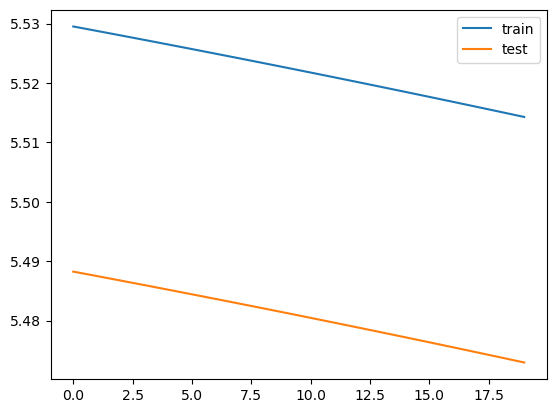

In [82]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [84]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,reconstruction_error,true_class
count,240.000000,240.000000
mean,226.922391,0.504167
std,347.070832,0.501028
min,5.343360,0.000000
25%,5.444926,0.000000
50%,11.207645,1.000000
75%,388.619869,1.000000
max,2490.081267,1.000000


In [86]:
error_df.head()

,reconstruction_error,true_class
44,5.388246,1
16,5.413073,1
8444,882.557391,0
218,5.430986,1
180,5.446842,1


In [88]:
threshold = 20

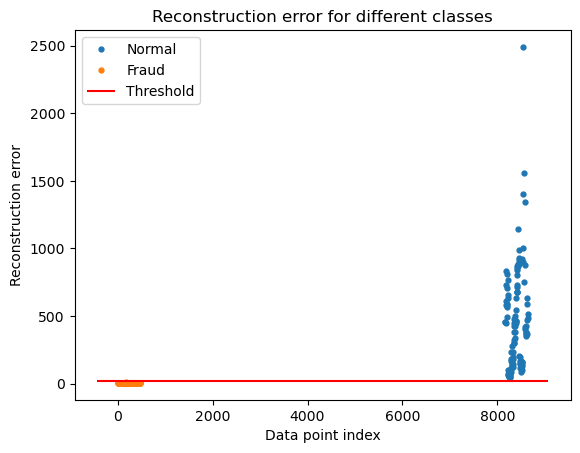

In [90]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

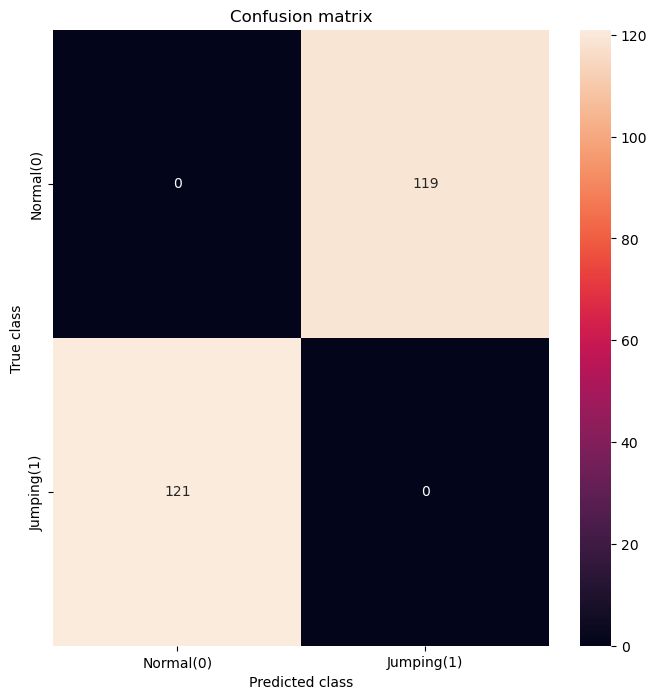

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     119.0
           1       0.00      0.00      0.00     121.0

    accuracy                           0.00     240.0
   macro avg       0.00      0.00      0.00     240.0
weighted avg       0.00      0.00      0.00     240.0



In [96]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))